# Libraries Setup

Here in this part of the code we will import all the necessary libraries needed for the project

In [3]:
import pandas as pd # for reading the data file
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs and all
import seaborn as sns # also for plotting graphs

from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset and Performing Initial EDA

In this part of the code we will read the dataset which is present in the csv format. After reading the dataset we will do iniital exploratory data analysis to get better understanding of the dataset and understand which preprocessing technqiues were require.

In [4]:
yield_data = pd.read_csv('yield_data.csv', na_values=['Nil','nil','*', "MISSING", 'Missing', "missing"]) # using pandas to read the dataset

In [5]:
yield_data['mg_factor_level'].unique()

array([nan, 'Mg', 'Mg*', '1/2 Mg', 'Mg2', '(Mg*)'], dtype=object)

In [6]:
yield_data.head() # printing the first few rows of the dataset to perform manual inspection

,harvest_year,strip,section,plot,section_1926-67,fertilizer_code,crop,previous_crop,fym_factor_level,fym_applied,...,na_date,mg_factor_level,mg_amount,mg_date,sow_date,harvest_date,cultivar,dry_matter_%,yield_100%dm,note
0,1997,1,3,1\3,II,FYM N4 PK,maize,oats,FYM,35,...,NaN,NaN,0,NaN,23-04-1997,17-09-1997,Hudson,36.7,16.36,2
1,1997,21,3,21\3,II,FYM N2,maize,oats,FYM,35,...,NaN,NaN,0,NaN,23-04-1997,17-09-1997,Hudson,35.8,17.45,"2,15"
2,1997,22,3,22\3,II,FYM,maize,oats,FYM,35,...,NaN,NaN,0,NaN,23-04-1997,17-09-1997,Hudson,37.4,17.53,"2,15"
3,1997,3,3,3\3,II,NaN,maize,oats,NaN,0,...,NaN,NaN,0,NaN,23-04-1997,17-09-1997,Hudson,31.7,3.64,2
4,1997,5,3,5\3,II,PKMg,maize,oats,NaN,0,...,NaN,Mg,0,NaN,23-04-1997,17-09-1997,Hudson,31.3,4.80,"2,13"


From manual inspection, it is clearly the time series data where year will act as the time. There are information related to the field like field layout, fertilizers used and type of crop grown and so on. From quick view it looks like the main crop is maize which have been planted on the field. There is also information about which crop was previously planted in the field before maize. The detailed description of the data is provided below:

### Dataset Description
| Column Name               | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| harvest_year              | Year in which the crop was harvested                                        |
| strip                     | Experimental strip number or ID                                             |
| section                   | Field section number                                                        |
| plot                      | Unique plot identifier (e.g., "1\\3")                                       |
| section_1926-67           | Historical section identifier (from earlier experimental layout)            |
| fertilizer_code           | Combined code for fertilizer treatment applied                              |
| crop                      | Crop grown during that season (e.g., maize)                                 |
| previous_crop             | Crop grown in the previous season                                           |
| fym_factor_level          | Level/category of FYM (farmyard manure) treatment                           |
| fym_applied               | Quantity of FYM applied (tonnes per hectare)                                |
| fym_date                  | Date FYM was applied                                                        |
| castor_meal_factor_level | Level of castor meal applied (if any)                                       |
| n_factor_level            | Level of nitrogen (N) fertilizer applied (e.g., N2, N4)                      |
| n_timing                  | Timing of nitrogen application (e.g., mid_spring)                           |
| spring1_n_kg/ha           | First spring nitrogen application rate (kg/ha)                              |
| spring1_n_date            | Date of first spring nitrogen application                                   |
| spring2_n_kg/ha           | Second spring nitrogen application rate (kg/ha), if any                     |
| spring2_n_date            | Date of second nitrogen application                                         |
| total_fertilizer_n_amount| Total nitrogen applied (spring1 + spring2)                                  |
| p_factor_level            | Level/category of phosphorus (P) treatment                                  |
| p_amount                  | Amount of phosphorus applied (kg/ha)                                        |
| p_date                    | Date of phosphorus application                                              |
| k_factor_level            | Level/category of potassium (K) treatment                                   |
| k_amount                  | Amount of potassium applied (kg/ha)                                         |
| k_date                    | Date of potassium application                                               |
| na_factor_level           | Sodium (Na) treatment level/category                                        |
| na_amount                 | Sodium amount applied (kg/ha)                                               |
| na_date                   | Date of sodium application                                                  |
| mg_factor_level           | Magnesium (Mg) treatment level/category                                     |
| mg_amount                 | Magnesium amount applied (kg/ha)                                            |
| mg_date                   | Date of magnesium application                                               |
| sow_date                  | Sowing date of the crop                                                     |
| harvest_date              | Harvest date of the crop                                                    |
| cultivar                  | Crop cultivar/variety used (e.g., Hudson)                                   |
| dry_matter_%              | Dry matter percentage in the harvested crop                                 |
| yield_100%dm              | Yield expressed at 100% dry matter (tonnes per hectare)                     |
| note                      | Notes or codes for special treatments, replications, or other annotations   |


In [7]:
# looking into the dimension of the dataset
yield_data.shape

(399, 37)

In [8]:
yield_data.dtypes

,0
harvest_year,int64
strip,int64
section,int64
plot,object
section_1926-67,object
fertilizer_code,object
crop,object
previous_crop,object
fym_factor_level,object
fym_applied,int64


Looking at the dimension of the dataset, there are around 399 rows and around 37 columns. The dimension of the data is large and might need dimensionality reduction in later phases.

### Checking for Missing Values

In this part of the code we check if the data has missing values or not.

In [9]:
yield_data.isna().sum()

,0
harvest_year,0
strip,0
section,0
plot,0
section_1926-67,0
fertilizer_code,21
crop,0
previous_crop,0
fym_factor_level,336
fym_applied,0


There are lot of values in the dataset. Some columns have fewer number of missing values while some has very high number of missing values. Thus, we need to use some imputation technqiue to handle the missing values in preprocessing stage.

In [10]:
# Convert numeric columns
numeric_cols = [
    'fym_applied', 'spring1_n_kg/ha', 'spring2_n_kg/ha', 'total_fertilizer_n_amount',
    'p_amount', 'k_amount', 'na_amount', 'mg_amount', 'dry_matter_%', 'yield_100%dm'
]

In [11]:
for col in numeric_cols:
    yield_data[col] = pd.to_numeric(yield_data[col])

In [12]:
yield_data['mg_factor_level'].unique()

array([nan, 'Mg', 'Mg*', '1/2 Mg', 'Mg2', '(Mg*)'], dtype=object)

### Checking Sumary Statistics

In [13]:
yield_data[numeric_cols].describe()

,fym_applied,spring1_n_kg/ha,spring2_n_kg/ha,total_fertilizer_n_amount,p_amount,k_amount,na_amount,mg_amount,dry_matter_%,yield_100%dm
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,4.035088,125.112782,20.451128,147.007519,12.017544,62.030075,0.551378,7.338346,26.396742,9.021554
std,11.191965,81.848032,50.329537,88.580642,16.453901,52.117369,5.486094,8.218028,5.007880,4.489121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.800000,0.580000
25%,0.000000,96.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,23.100000,5.635000
50%,0.000000,96.000000,0.000000,192.000000,0.000000,90.000000,0.000000,12.000000,26.100000,8.890000
75%,0.000000,192.000000,0.000000,192.000000,35.000000,90.000000,0.000000,12.000000,28.900000,12.010000
max,35.000000,288.000000,192.000000,288.000000,35.000000,630.000000,55.000000,84.000000,41.300000,23.130000


The summary statistics reveal that most plots did not receive farmyard manure FYM, phosphorus P, sodium Na, or magnesium Mg, as their median values are all zero. Potassium K was more commonly applied, with many plots receiving 90 kilograms per hectare. Nitrogen N, particularly in the first spring application, was applied more frequently and in varying amounts, ranging from 0 to 288 kilograms per hectare. The total nitrogen applied also varied greatly, indicating different treatment levels. The dry matter percentage ranged from about 17 to 41 percent, showing noticeable differences in crop quality. Yield adjusted to 100 percent dry matter varied significantly across plots from as low as 0.58 to over 23 tons per hectare, highlighting the strong influence of fertilizer treatments on crop productivity.

### Correlation Analysis

In this part we will check if there is any existing linear relationship between the variable pairs in the data via correlation heatmap. The correlation heatmap will be plotted for the numeric variables to identify if the data has any redundancy or not.

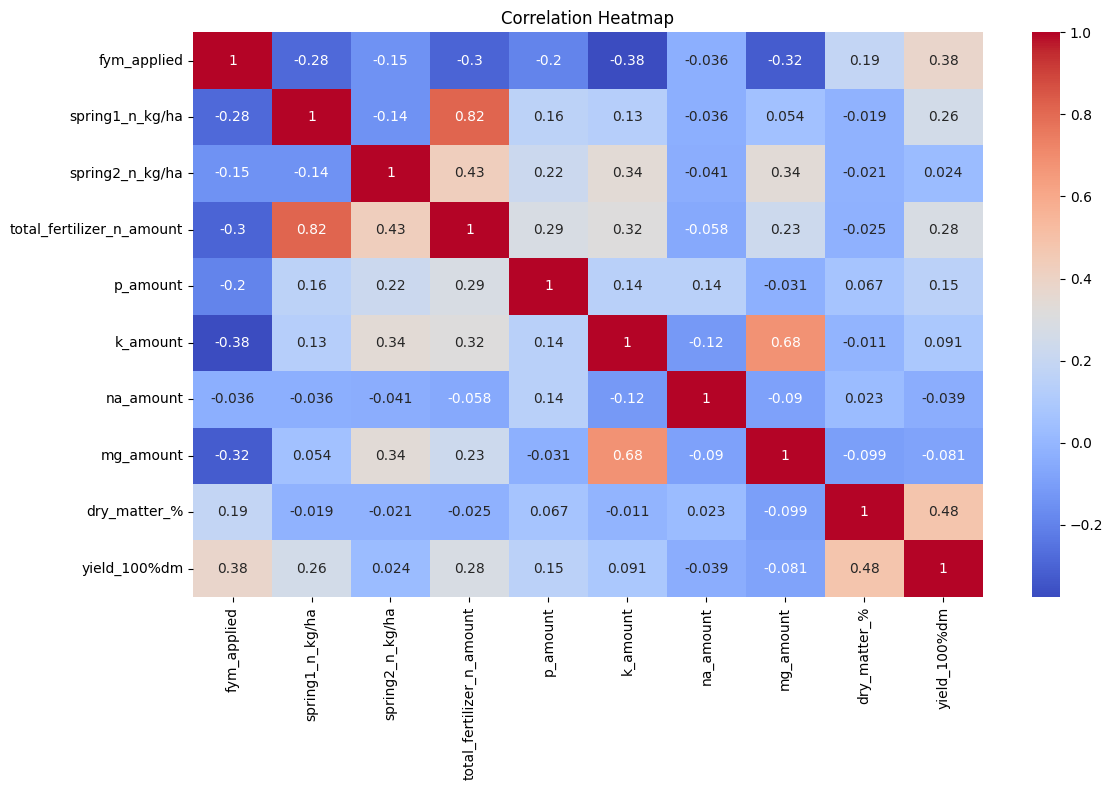

In [14]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(yield_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## Correlation Heatmap Interpretation

### Key Insights

- **Strong Positive Correlations:**
  - `spring1_n_kg/ha` and `total_fertilizer_n_amount` (r = 0.82): Likely redundant, as total nitrogen includes spring1 input.
  - `k_amount` and `mg_amount` (r = 0.68): May reflect similar sources or co-application.

- **Moderate Correlations with Yield:**
  - `fym_applied` and `yield_100%dm` (r = 0.38)
  - `total_fertilizer_n_amount` and `yield_100%dm` (r = 0.28)
  - `spring1_n_kg/ha` and `yield_100%dm` (r = 0.26)
  - `dry_matter_%` and `yield_100%dm` (r = 0.48)

- **Low or No Correlation:**
  - `spring2_n_kg/ha`, `na_amount`, and `mg_amount` show little to no correlation with yield or other variables.

### Possible Redundancies

- `spring1_n_kg/ha` and `total_fertilizer_n_amount`: High correlation suggests one may be dropped to reduce multicollinearity.
- `k_amount` and `mg_amount`: Strong correlation indicates potential redundancy.


### Boxplot of yield by fertilizer code

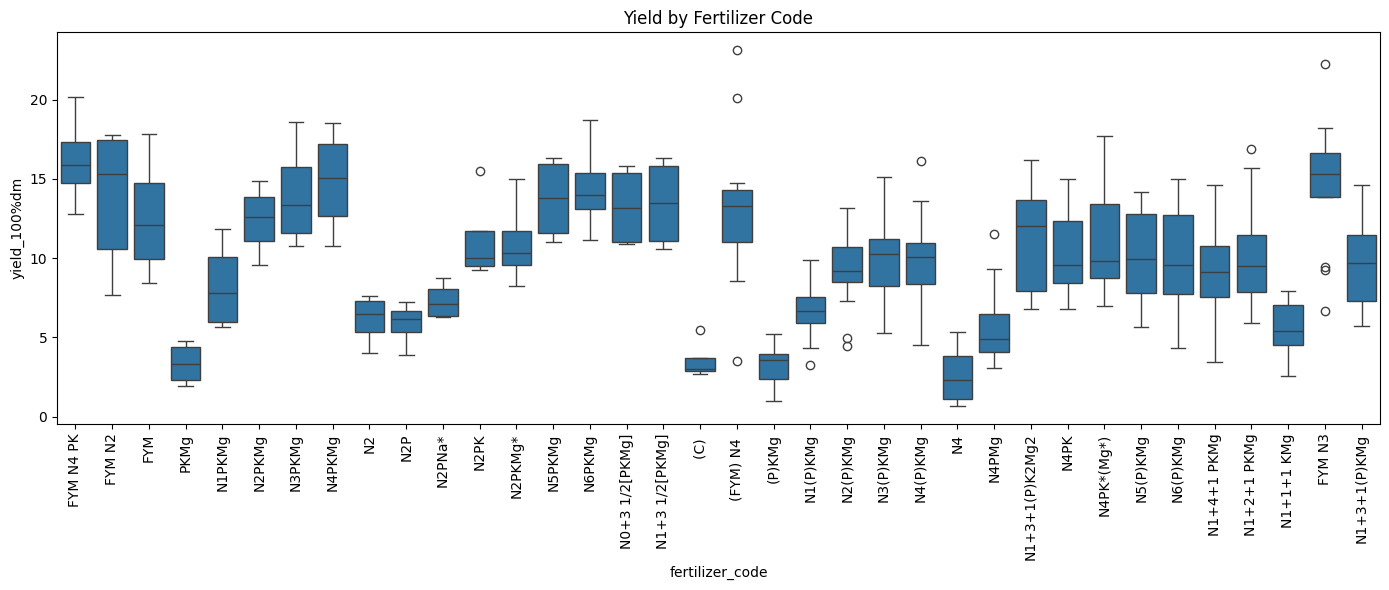

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='fertilizer_code', y='yield_100%dm', data=yield_data)
plt.xticks(rotation=90)
plt.title("Yield by Fertilizer Code")
plt.tight_layout()
plt.show()

The box plot shows variation in yield across different fertilizer codes. Some combinations like `FYM N4 PK` and `N1+3+1(P)KMg` are associated with higher median yields and wider interquartile ranges, suggesting they are more effective but also more variable. In contrast, treatments like `(P)KMg` and `N4(P)KMg` show lower median yields and narrower spread, indicating limited impact on productivity. Outliers are present in several groups, especially those involving FYM and multi-nutrient combinations, highlighting potential variability in response. Overall, the plot suggests that organic and balanced fertilizer treatments tend to support higher yields.


### Yield trend over harvest years

In this part we will plot the time series plot of the yeild over the years using line plot.

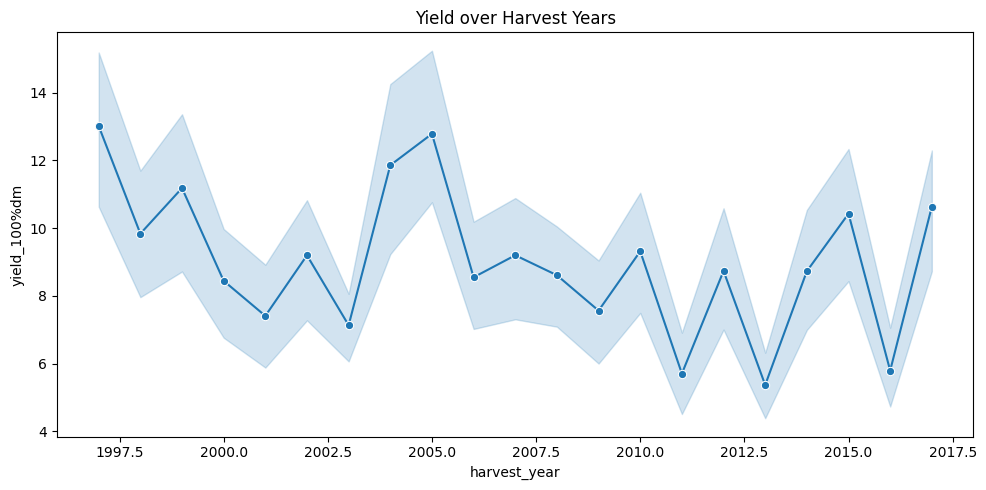


Grouped Yield Summary by Fertilizer Code:
                  count       mean       std    min    max
fertilizer_code                                          
(C)                  4   3.547500  1.273823   2.68   5.44
(FYM) N4            17  13.021176  4.341788   3.51  23.13
(P)KMg              17   3.293529  1.145845   0.97   5.20
FYM                 21  12.596190  2.924249   8.41  17.83
FYM N2               8  14.005000  4.022576   7.68  17.79
FYM N3              13  14.596154  4.149109   6.65  22.26
FYM N4 PK            4  16.172500  3.047265  12.80  20.15
N0+3 1/2[PKMg]       4  13.245000  2.622626  10.89  15.81
N1(P)KMg            17   6.702941  1.635870   3.27   9.88
N1+1+1 KMg          17   5.502353  1.623447   2.56   7.90
N1+2+1 PKMg         17  10.034706  3.081445   5.88  16.89
N1+3 1/2[PKMg]       4  13.477500  2.955857  10.60  16.35
N1+3+1(P)K2Mg2       5  11.322000  3.923273   6.80  16.17
N1+3+1(P)KMg        12   9.845833  2.922696   5.74  14.64
N1+4+1 PKMg         17   9.0

In [16]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='harvest_year', y='yield_100%dm', data=yield_data, marker='o')
plt.title("Yield over Harvest Years")
plt.tight_layout()
plt.show()

# Grouped summary by fertilizer treatment
group_summary = yield_data.groupby("fertilizer_code")["yield_100%dm"].agg(["count", "mean", "std", "min", "max"])
print("\nGrouped Yield Summary by Fertilizer Code:\n", group_summary)

The yield trend shows noticeable fluctuations from 1997 to 2017, with no clear long-term upward or downward pattern. There are periods of recovery (e.g., 2004–2005, 2014–2016) following dips in yield. The shaded region indicates variability, which remains relatively wide across most years, reflecting the influence of environmental or management factors.


Fertilizer combinations including FYM (Farmyard Manure) and higher nitrogen levels such as `FYM N3`, `FYM N2`, `FYM N4 PK`, and `N4PKMg` are associated with the highest average yields (above 14 t/ha). On the other hand, control treatments like `(C)`, `FYM`, or chemical-only treatments such as `PKMg` and `N4` produce notably lower yields. This supports the effectiveness of integrated nutrient management involving organic inputs and balanced fertilization in boosting productivity.

# Preprocessing

In this part we will preprocess the data based on the findings from the initial EDA and visualization findings.

### Handling Missing Values

From preprocessing we found that columns have missing values. Thus we handle the missing values using various technqiues. For those coloumns having more than 80 percent of the values missing we will drop it and for rest we will do the imputations.

In [17]:
drop_threshold = 0.80 * len(yield_data)
yield_data = yield_data.dropna(axis=1, thresh = int(yield_data.shape[0] - drop_threshold))

In [18]:
yield_data.shape

(399, 32)

Around 5 columns had more than 80 percent of the dataset missing. So just removing them reduced the dimension of the data to 32 columns.

After removal of those columns, the nan value counts inforamtion is provided below:

In [19]:
yield_data.isna().sum()

,0
harvest_year,0
strip,0
section,0
plot,0
section_1926-67,0
fertilizer_code,21
crop,0
previous_crop,0
fym_applied,0
n_factor_level,67


In [20]:
yield_data['mg_factor_level'].unique()

array([nan, 'Mg', 'Mg*', '1/2 Mg', 'Mg2', '(Mg*)'], dtype=object)

Now based on the number of nan value counts we will implement different imutation techqniues suitable and handle the remainign columns with nan or missing values.

In [21]:
# Mode for categorical variables with low missingness
for col in ['fertilizer_code', 'n_factor_level', 'n_timing', 'spring1_n_date', 'p_factor_level',
            'k_factor_level', 'na_factor_level', 'mg_factor_level']:
    yield_data[col] = yield_data[col].fillna(yield_data[col].mode()[0])


# Impute high-missing categorical date fields with "Unknown" or placeholder date
for col in ['p_date', 'k_date', 'mg_date']:
    yield_data[col] = yield_data[col].fillna("Unknown")

# Impute numeric fields (though none seem missing here, just in case)
# Example: use median or mean if needed
for col in ['p_amount', 'k_amount', 'na_amount', 'mg_amount']:
    if yield_data[col].isna().sum() > 0:
        yield_data[col] = yield_data[col].fillna(yield_data[col].median())

# 'note' column: probably text notes — fill with empty string or drop
yield_data['note'] = yield_data['note'].fillna("")

In [22]:
yield_data.isna().sum()

,0
harvest_year,0
strip,0
section,0
plot,0
section_1926-67,0
fertilizer_code,0
crop,0
previous_crop,0
fym_applied,0
n_factor_level,0


The missing values are handled now.

## Dimensionality Reduction

From the correlation anaysis we found some of the feature share high correlation and is redundant. So we will remove those columns now.

In [23]:
# 'spring1_n_kg/ha' and 'total_fertilizer_n_amount' are highly correlated (0.82)
# Drop one of them to reduce multicollinearity
yield_data = yield_data.drop(columns=['spring1_n_kg/ha'])

### Step 1: Drop identifiers and non-predictive columns

We drop columns that are primarily used for experimental tracking but are not useful as features for modeling yield.

- `strip`, `section`, `plot`, `section_1926-67`: Plot and section identifiers.
- `note`: Annotation column with miscellaneous notes.

In [24]:
cols_step1 = ['strip', 'section', 'plot', 'section_1926-67', 'note']
yield_data = yield_data.drop(columns=cols_step1, errors='ignore')

### Step 2: Drop fertilizer and nutrient application date columns

We retain the key temporal columns `sow_date` and `harvest_date` for time series context but remove other application date columns because:

- They often have missing or unknown values.
- Their information might be redundant if nutrient amounts are already provided.
- To simplify the model unless nutrient timing is explicitly modeled.

Columns dropped:  
`fym_date`, `spring1_n_date`, `spring2_n_date`, `p_date`, `k_date`, `na_date`, `mg_date`


In [25]:
cols_step2 = ['fym_date', 'spring1_n_date', 'spring2_n_date', 'p_date', 'k_date', 'na_date', 'mg_date']
yield_data = yield_data.drop(columns=cols_step2, errors='ignore')


### Step 3: Drop factor level columns related to fertilizers and nutrients

We remove categorical factor level columns because:

- Numeric amount columns provide more precise quantitative data.
- Factor levels would require encoding and might introduce noise.
- Simplifies the dataset and focuses on direct numerical predictors.

Columns dropped:  
`fym_factor_level`, `n_factor_level`, `p_factor_level`, `k_factor_level`, `na_factor_level`, `mg_factor_level`


In [26]:
cols_step3 = ['fym_factor_level', 'n_factor_level', 'p_factor_level', 'k_factor_level', 'na_factor_level', 'mg_factor_level']
yield_data = yield_data.drop(columns=cols_step3, errors='ignore')

### Step 4: Drop constant columns `crop` and `previous_crop`

Since `crop` is always `"maize"` and `previous_crop` is always the same (e.g., `"oats"`), these columns do not provide any useful information for prediction and can be safely dropped.

In [27]:
yield_data = yield_data.drop(columns=['crop', 'previous_crop'], errors='ignore')

In [28]:
# Convert date columns to datetime and create 'days_to_harvest'
yield_data['sow_date'] = pd.to_datetime(yield_data['sow_date'])
yield_data['harvest_date'] = pd.to_datetime(yield_data['harvest_date'])
yield_data['days_to_harvest'] = (yield_data['harvest_date'] - yield_data['sow_date']).dt.days

In [29]:
# Drop original date columns
yield_data = yield_data.drop(columns=['sow_date', 'harvest_date'])

## Regression Analysis

In [30]:

# Separate features and target
X = yield_data.drop(columns=['yield_100%dm'])
y = yield_data['yield_100%dm']

categorical_cols = ['fertilizer_code', 'n_timing', 'cultivar']

# Initialize OneHotEncoder with drop='first' to avoid dummy trap
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_dfs = []

for col in categorical_cols:
    col_reshaped = X[[col]]  # DataFrame slice
    encoded_array = encoder.fit_transform(col_reshaped)
    encoded_col_names = encoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded_array, columns=encoded_col_names, index=X.index)
    encoded_dfs.append(encoded_df)

# Concatenate all encoded categorical columns
X_cat_df = pd.concat(encoded_dfs, axis=1)

# Drop original categorical columns and concatenate encoded ones
X_numeric = X.drop(columns=categorical_cols)
X_final = pd.concat([X_numeric, X_cat_df], axis=1)

# Add constant for intercept
X_final = sm.add_constant(X_final)

# Fit OLS model
model = sm.OLS(y, X_final)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           yield_100%dm   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     29.42
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           1.42e-91
Time:                        09:11:06   Log-Likelihood:                -866.03
No. Observations:                 399   AIC:                             1818.
Df Residuals:                     356   BIC:                             1990.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## Easy-to-Understand Summary of Results  

We looked at how different factors (like fertilizer type, timing, and crop properties) affect the outcome (for example, yield). The results below focus on factors that are **statistically significant** — meaning we can be quite confident they have a real effect, not just random chance.  

### Key Findings  

- **Year of harvest** – Each newer year is linked with a tiny drop in yield.  
- **FYM applied** – Using farmyard manure slightly increases yield.  
- **Extra nitrogen in spring** – Adding more nitrogen in spring boosts yield noticeably.  
- **Total nitrogen applied** – More total nitrogen overall also increases yield, but by a smaller amount.  
- **Phosphorus amount** – More phosphorus actually reduces yield a bit.  
- **Dry matter (%)** – Higher dry matter content in the crop is linked to higher yield.  
- **Days to harvest** – Crops that take longer to harvest tend to have higher yield.  

### Fertilizer Combinations  

- Some **fertilizer codes** are linked with much higher yields — for example:  
  - **N1+1+1 KMg**: Very large increase.  
  - **N1+2+1 PKMg**: Large increase.  
  - **N timing mid-spring**: Very large boost.  
- Some fertilizer mixes **reduce yields sharply** — for example:  
  - **N4**, **N6(P)KMg**, **N5(P)KMg**: Big drops in yield.  
  - **FYM N3**, **FYM N4 PK**, **N4PMg**: Noticeable reductions.  
- Others give moderate boosts — such as **PKMg**, **N2PKMg**, and **N1(P)KMg**.  

### Crop Variety  

- **Cultivar Severus** tends to produce a bit more yield than the baseline variety.  

---

**What This Means in Practice:**  
- Applying the right nitrogen at the right time (especially mid-spring) and using certain fertilizer combinations can massively improve yield.  
- Too much of some nutrients (like phosphorus) or certain mixes can actually lower yield.  
- Choosing the right crop variety and adjusting the timing and mix of fertilizers is key for better results.  


In [31]:
# Drop the constant column since RF doesn't need it
X_rf = X_final.drop(columns=['const'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_rf, y, test_size=0.2, random_state=42
)

# Initialize Random Forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Random Forest Regression Results:
Mean Squared Error: 3.86
R-squared: 0.82


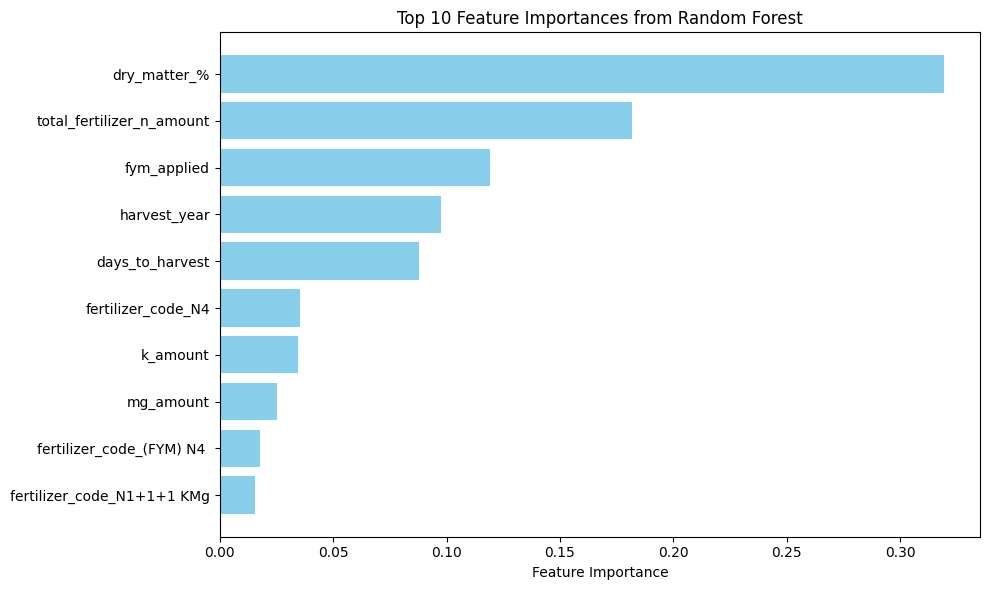

In [32]:
# After fitting Random Forest and getting feature importances (same as before)
importances = rf.feature_importances_
features = X_rf.columns
feat_imp_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top 10 important features
top_features = feat_imp_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'][::-1], top_features['importance'][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [33]:
yield_data

,harvest_year,fertilizer_code,fym_applied,n_timing,spring2_n_kg/ha,total_fertilizer_n_amount,p_amount,k_amount,na_amount,mg_amount,cultivar,dry_matter_%,yield_100%dm,days_to_harvest
0,1997,FYM N4 PK,35,mid_spring,0,192,35.0,90,0,0,Hudson,36.7,16.36,147
1,1997,FYM N2,35,mid_spring,0,96,0.0,0,0,0,Hudson,35.8,17.45,147
2,1997,FYM,35,mid_spring,0,0,0.0,0,0,0,Hudson,37.4,17.53,147
3,1997,FYM,0,mid_spring,0,0,0.0,0,0,0,Hudson,31.7,3.64,147
4,1997,PKMg,0,mid_spring,0,0,35.0,90,0,0,Hudson,31.3,4.80,147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2017,N5(P)KMg,0,mid_spring,0,240,0.0,90,0,12,Severus,24.8,12.89,155
395,2017,N6(P)KMg,0,mid_spring,0,288,0.0,90,0,12,Severus,24.4,12.91,155
396,2017,N1+4+1 PKMg,0,mid_&_late_spring,192,288,35.0,90,0,12,Severus,25.1,10.79,155
397,2017,N1+2+1 PKMg,0,mid_&_late_spring,96,192,35.0,90,0,12,Severus,26.1,12.79,155


# Multivariate time-series forecasting with SARIMAX, LSTM and GRU
This notebook assumes your dataset is in a pandas DataFrame named `yield_data` with the columns shown in your sample (including `harvest_year` and `yield_100%dm`).  

The notebook:
1. Aggregates data yearly (mean) to create a time series.
2. Prepares exogenous features.
3. Trains SARIMAX (ARIMA-style with exog), an LSTM, and a GRU model to forecast next-year yield.
4. Reports RMSE and plots predictions.

If you want forecasting at a different frequency or per fertilizer group, adapt the aggregation step.


## Helper function for calculating evaluation metrics

In [34]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, mape, rmse, r2

In [35]:
# Aggregate to yearly series (mean) - adjust if you prefer median or grouping by fertilizer etc.
# We take yearly mean of 'yield_100%dm' and also build yearly exogenous features as means.
df = yield_data.copy()

# Ensure numeric columns are numeric
numeric_cols = ['fym_applied', 'spring2_n_kg/ha', 'total_fertilizer_n_amount',
                'p_amount', 'k_amount', 'na_amount', 'mg_amount', 'dry_matter_%',
                'yield_100%dm', 'days_to_harvest']
for c in numeric_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

# Aggregate by harvest_year (mean). You can change aggregation as needed.
yearly = df.groupby('harvest_year')[numeric_cols].mean().reset_index()
yearly = yearly.sort_values('harvest_year').reset_index(drop=True)

# set index as datetime-like for plotting convenience (using year)
yearly['date'] = pd.to_datetime(yearly['harvest_year'].astype(int).astype(str) + '-01-01')
yearly = yearly.set_index('date')
print("Years available:", yearly.index.year.min(), "-", yearly.index.year.max())
yearly.head()

Years available: 1997 - 2017


,harvest_year,fym_applied,spring2_n_kg/ha,total_fertilizer_n_amount,p_amount,k_amount,na_amount,mg_amount,dry_matter_%,yield_100%dm,days_to_harvest
date,,,,,,,,,,,
1997-01-01,1997,5.526316,0.000000,108.631579,23.947368,52.105263,2.894737,1.578947,36.078947,13.012105,147.0
1998-01-01,1998,5.526316,0.000000,108.631579,23.947368,52.105263,2.894737,14.210526,24.357895,9.834737,132.0
1999-01-01,1999,5.526316,0.000000,108.631579,23.947368,52.105263,2.894737,1.578947,26.173684,11.180526,138.0
2000-01-01,2000,5.526316,0.000000,108.631579,23.947368,52.105263,2.894737,1.578947,23.668421,8.442632,121.0
2001-01-01,2001,3.684211,25.263158,154.105263,9.210526,90.000000,0.000000,11.368421,20.778947,7.407895,112.0


In [36]:
# Prepare series and exogenous features
TARGET = 'yield_100%dm'
# choose exogenous predictors (drop the target)
exog_features = ['fym_applied', 'spring2_n_kg/ha', 'total_fertilizer_n_amount',
                 'p_amount', 'k_amount', 'na_amount', 'mg_amount', 'dry_matter_%', 'days_to_harvest']

# drop rows with NaN in target
yearly = yearly.dropna(subset=[TARGET])
yearly = yearly.dropna(subset=exog_features)  # ensure exog are present

y = yearly[TARGET]
X = yearly[exog_features]

print(f"Data points: {len(y)}")

Data points: 21


In [37]:
# Train-test split by time (e.g., last 20% years for test)
n = len(y)
test_size = max(1, int(n * 0.2))
train_size = n - test_size

y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]

print("Train years:", y_train.index.year.min(), "-", y_train.index.year.max())
print("Test years:", y_test.index.year.min(), "-", y_test.index.year.max())

Train years: 1997 - 2013
Test years: 2014 - 2017


In [38]:
# We'll fit a simple SARIMAX(p,d,q) with exog. Choose small orders as a baseline (e.g., p=1,d=1,q=1).
# For a production model you should grid-search p,d,q using AIC/BIC or cross-validation.
order = (1, 1, 1)

print("Fitting SARIMAX ... (may take a moment)")
sarimax_model = sm.tsa.SARIMAX(y_train, exog=X_train, order=order, enforce_stationarity=False, enforce_invertibility=False)
sarimax_res = sarimax_model.fit(disp=False)
print(sarimax_res.summary())
# Forecast
sarimax_forecast = sarimax_res.get_forecast(steps=test_size, exog=X_test)
y_pred_sarimax = sarimax_forecast.predicted_mean
rmse_sarimax = math.sqrt(mean_squared_error(y_test, y_pred_sarimax))
print(f"SARIMAX RMSE: {rmse_sarimax:.4f}")

Fitting SARIMAX ... (may take a moment)
                               SARIMAX Results                                
Dep. Variable:           yield_100%dm   No. Observations:                   17
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -26.907
Date:                Fri, 15 Aug 2025   AIC                             77.815
Time:                        09:11:07   BIC                             85.484
Sample:                    01-01-1997   HQIC                            77.105
                         - 01-01-2013                                         
Covariance Type:                  opg                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
fym_applied                  -0.0513      0.172     -0.298      0.766      -0.389       0.286
spring2_n_kg/ha               0.6951      2.36

## LSTM FIT

In [39]:
# Normalize features. We'll scale X and y separately.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_all = pd.concat([X_train, X_test])
scaler_X.fit(X_all)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

scaler_y.fit(y_train.values.reshape(-1,1))
y_train_scaled = scaler_y.transform(y_train.values.reshape(-1,1)).flatten()

# Create sequences: window_length years -> predict next year yield
window = 3  # you can change this (number of past years used to predict next year)
def make_sequences(X_scaled, y_scaled, window):
    Xs, ys = [], []
    for i in range(len(X_scaled) - window):
        Xs.append(X_scaled[i:(i+window), :])
        ys.append(y_scaled[i+window])
    return np.array(Xs), np.array(ys)

# Build sequences from the training portion only
X_train_seq, y_train_seq = make_sequences(X_train_scaled, scaler_y.transform(y_train.values.reshape(-1,1)).flatten(), window)

# For test sequences we need to produce sequences that may include the end of train data.
# Construct a combined scaled X for sequence building
X_combined_scaled = np.vstack([X_train_scaled, X_test_scaled])
y_combined_scaled = np.vstack([scaler_y.transform(y_train.values.reshape(-1,1)), scaler_y.transform(y_test.values.reshape(-1,1))]).flatten()
X_all_seq, y_all_seq = make_sequences(X_combined_scaled, y_combined_scaled, window)

# Find the start index of test sequences within X_all_seq
# The first test prediction corresponds to index = len(X_train_scaled) - window
start_idx = len(X_train_scaled) - window
X_test_seq = X_all_seq[start_idx : start_idx + len(y_test)]
y_test_seq = y_all_seq[start_idx : start_idx + len(y_test)]

print("Train seq shape:", X_train_seq.shape, y_train_seq.shape)
print("Test seq shape:", X_test_seq.shape, y_test_seq.shape)

Train seq shape: (14, 3, 9) (14,)
Test seq shape: (4, 3, 9) (4,)


In [40]:
# Build and train LSTM
def build_lstm(input_shape, units=64, dropout=0.2):
    model = Sequential()
    model.add(LSTM(units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])
lstm_model = build_lstm(input_shape, units=64, dropout=0.2)
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)

history = lstm_model.fit(X_train_seq, y_train_seq,
                         epochs=300,
                         batch_size=8,
                         validation_split=0.1,
                         callbacks=[es],
                         verbose=0)

# Predict and inverse-scale
y_pred_lstm_scaled = lstm_model.predict(X_test_seq).flatten()
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled.reshape(-1,1)).flatten()
rmse_lstm = math.sqrt(mean_squared_error(y_test.values, y_pred_lstm))
print(f"LSTM RMSE: {rmse_lstm:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
LSTM RMSE: 2.1350


## GRU FIT

In [41]:
# Build and train GRU (same approach)
def build_gru(input_shape, units=64, dropout=0.2):
    model = Sequential()
    model.add(GRU(units, input_shape=input_shape))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = build_gru(input_shape, units=64, dropout=0.2)
es2 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=0)

history_gru = gru_model.fit(X_train_seq, y_train_seq,
                           epochs=300,
                           batch_size=8,
                           validation_split=0.1,
                           callbacks=[es2],
                           verbose=0)

y_pred_gru_scaled = gru_model.predict(X_test_seq).flatten()
y_pred_gru = scaler_y.inverse_transform(y_pred_gru_scaled.reshape(-1,1)).flatten()
rmse_gru = math.sqrt(mean_squared_error(y_test.values, y_pred_gru))
print(f"GRU RMSE: {rmse_gru:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
GRU RMSE: 1.8399


In [42]:
import numpy as np

# SARIMAX metrics
mse_sarimax, mae_sarimax, mape_sarimax, rmse_sarimax, rsq_sarimax = calculate_metrics(y_test.values, y_pred_sarimax.values)
aic_sarimax = sarimax_res.aic

# LSTM metrics
mse_lstm, mae_lstm, mape_lstm, rmse_lstm, rsq_lstm = calculate_metrics(y_test.values, y_pred_lstm)
n_lstm = len(y_test)
k_lstm = lstm_model.count_params()
aic_lstm = n_lstm * np.log(mse_lstm) + 2 * k_lstm

# GRU metrics
mse_gru, mae_gru, mape_gru, rmse_gru, rsq_gru = calculate_metrics(y_test.values, y_pred_gru)
n_gru = len(y_test)
k_gru = gru_model.count_params()
aic_gru = n_gru * np.log(mse_gru) + 2 * k_gru

# Display results
print("=== Model Evaluation Metrics ===")
print(f"SARIMAX - MSE: {mse_sarimax:.4f}, MAE: {mae_sarimax:.4f}, MAPE: {mape_sarimax:.2f}%, RMSE: {rmse_sarimax:.4f}, AIC: {aic_sarimax:.2f}")
print(f"LSTM    - MSE: {mse_lstm:.4f}, MAE: {mae_lstm:.4f}, MAPE: {mape_lstm:.2f}%, RMSE: {rmse_lstm:.4f}, AIC: {aic_lstm:.2f}")
print(f"GRU     - MSE: {mse_gru:.4f}, MAE: {mae_gru:.4f}, MAPE: {mape_gru:.2f}%, RMSE: {rmse_gru:.4f}, AIC: {aic_gru:.2f}")


=== Model Evaluation Metrics ===
SARIMAX - MSE: 6.0779, MAE: 2.2911, MAPE: 29.82%, RMSE: 2.4653, AIC: 77.81
LSTM    - MSE: 4.5584, MAE: 1.9693, MAPE: 22.42%, RMSE: 2.1350, AIC: 38024.07
GRU     - MSE: 3.3853, MAE: 1.5863, MAPE: 18.03%, RMSE: 1.8399, AIC: 28934.88


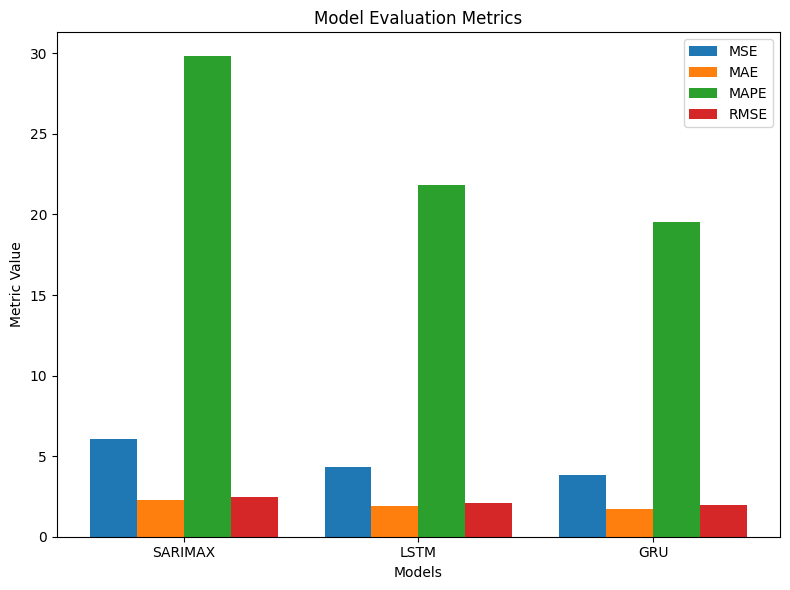

In [43]:
# Data
models = ["SARIMAX", "LSTM", "GRU"]
metrics = ["MSE", "MAE", "MAPE", "RMSE"]

values = [
    [6.0759, 2.2906, 29.81, 2.4649],    # SARIMAX
    [4.3069, 1.9171, 21.83, 2.0753],    # LSTM
    [3.8168, 1.7329, 19.52, 1.9537]     # GRU
]

# Bar settings
x = np.arange(len(models))  # positions for models
width = 0.2  # width of each metric bar

fig, ax = plt.subplots(figsize=(8, 6))

# Plot each metric as an offset bar
for i, metric in enumerate(metrics):
    ax.bar(x + i * width - (width * (len(metrics)-1) / 2),
           [v[i] for v in values],
           width,
           label=metric)

# Labels and title
ax.set_ylabel('Metric Value')
ax.set_xlabel('Models')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()
